In [1]:
# Import necessary libraries
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score,log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,train_test_split ,StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,ExtraTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier,BaggingRegressor,RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import *
from sklearn.svm import SVC
from sklearn.pipeline import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os

warnings.simplefilter('ignore')

os.chdir('D:\Datasets')

hr = pd.read_csv('Hr_comma_sep.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,support,low
14991,0.37,0.48,2,160,3,0,1,0,support,low
14992,0.37,0.53,2,143,3,0,1,0,support,low
14993,0.11,0.96,6,280,4,0,1,0,support,low


In [2]:
dum_hr = pd.get_dummies(hr, drop_first=True)

# Separate features (X) and target variable (y)
x = dum_hr.drop(['left'], axis=1)
y = dum_hr['left']
dum_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.10,0.77,6,247,4,0,1,0,False,False,False,False,False,False,True,False,False,True,False
3,0.92,0.85,5,259,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.89,1.00,5,224,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14991,0.37,0.48,2,160,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14992,0.37,0.53,2,143,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14993,0.11,0.96,6,280,4,0,1,0,False,False,False,False,False,False,False,True,False,True,False


In [3]:
# Split the data into training and testing sets
# 'x' and 'y' are the feature and target variables, respectively
# 'test_size=0.3' means 30% of the data will be used for testing
# 'stratify=y' ensures the class distribution in the training and testing sets is the same as the original data
# 'random_state=24' sets the random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=24)

# Create an instance of the AdaBoost Classifier
adab = AdaBoostClassifier()

# Fit the AdaBoost Classifier to the training data
# This trains the model on the training data
adab.fit(x_train, y_train)

# Use the trained AdaBoost Classifier to predict the classes of the test data
# This applies the trained model to the test data to get the predicted classes
y_pred = adab.predict(x_test)

# Calculate and print the accuracy score of the predictions
# The accuracy score measures the proportion of correct predictions made by the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9586574794398756


# Adaboosting

In [12]:
# Create a Stratified K-Fold cross-validation object
# This will split the data into 5 folds, ensuring the class distribution in each fold is the same as the original data
# 'shuffle=True' ensures the data is shuffled before splitting
# 'random_state=24' sets the random seed for reproducibility
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

# Create instances of the base estimators
adab = AdaBoostClassifier()
nb = GaussianNB()
lr = LogisticRegression()
dtc = DecisionTreeClassifier(max_depth=1)

# Define the hyperparameter grid to search over
# 'n_estimators' controls the number of estimators in the AdaBoost ensemble
# 'estimator' is the base estimator to be used in the AdaBoost ensemble
params = {'n_estimators': [7, 50, 75], 'estimator': [lr, dtc, nb]}

# Create a GridSearchCV object
# This will perform a grid search to find the best combination of hyperparameters
# 'cv=kfold' uses the Stratified K-Fold cross-validation object
# 'verbose=3' sets the verbosity level to 3, which will print progress updates
# 'scoring='neg_log_loss'' sets the scoring metric to negative log loss (lower is better)
gcv = GridSearchCV(adab, param_grid=params, cv=kfold, scoring='neg_log_loss')

# Fit the GridSearchCV object to the data
# This will perform the grid search and find the best hyperparameters
gcv.fit(x, y)

# Print the best parameters found by the GridSearchCV
print("Best Parameters:", gcv.best_params_)

# Print the best score (i.e., the lowest negative log loss) found during the grid search
print("Best Score:", gcv.best_score_)

# Get the best model from the GridSearchCV object
best_model = gcv.best_estimator_

Best Parameters: {'estimator': DecisionTreeClassifier(max_depth=1), 'n_estimators': 7}
Best Score: -0.47724268892752697


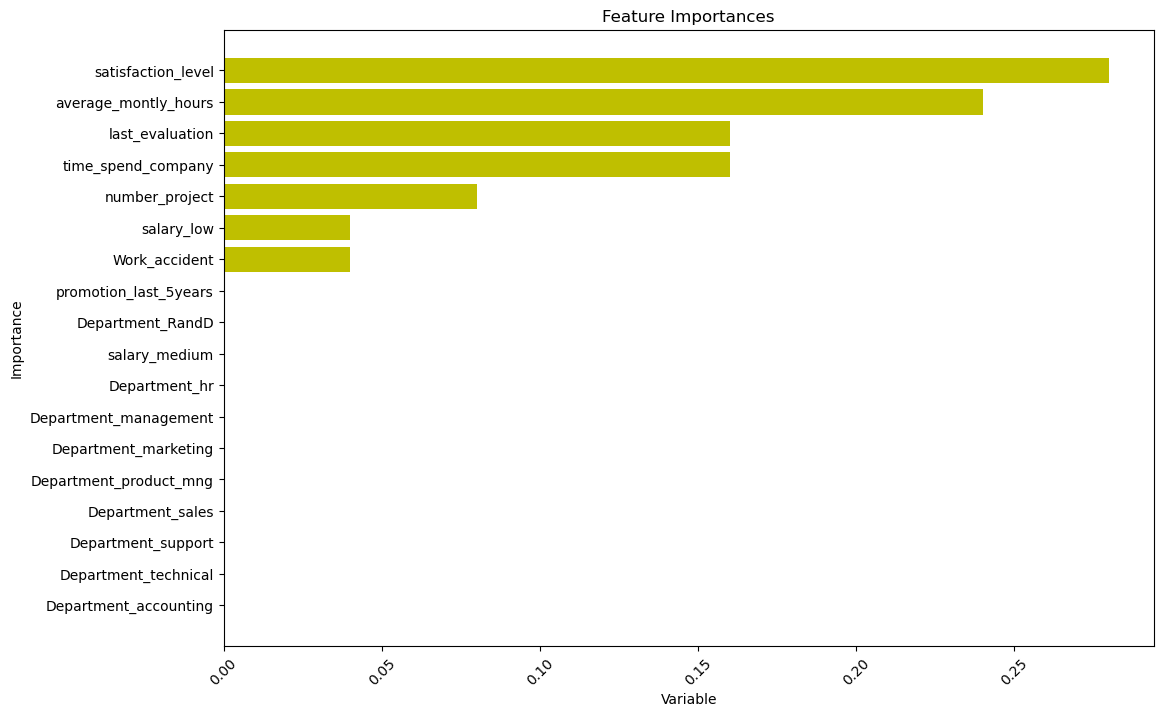

In [8]:

pd_imp = pd.DataFrame({'var': list(x.columns), 'imp': best_model.feature_importances_})
pd_imp.sort_values(by='imp', inplace=True)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(12, 8))  # Set the figure size
plt.barh(pd_imp['var'], pd_imp['imp'], color='y')

# Add labels and title
plt.xlabel('Variable')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.ylabel('Importance')
plt.title('Feature Importances')

# Display the plot
plt.show()